In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = False)

In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X, y =mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

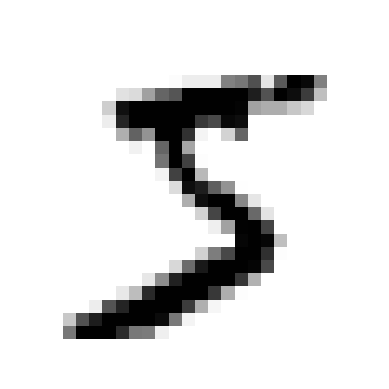

In [22]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
# save_fig("some_digit_plot")
plt.show()

The cmap is the feature that helps in describing the color scheme of the image. For the MNIST data set the pixel values 0 to 255 where each values represent brightness. The color map decides "which color should each pixel value appear as?".

The axis shows the 28 axis of the pixel . when mentioned "off" it is not shown. Just the image is seen.

In [26]:
y[0]

'5'

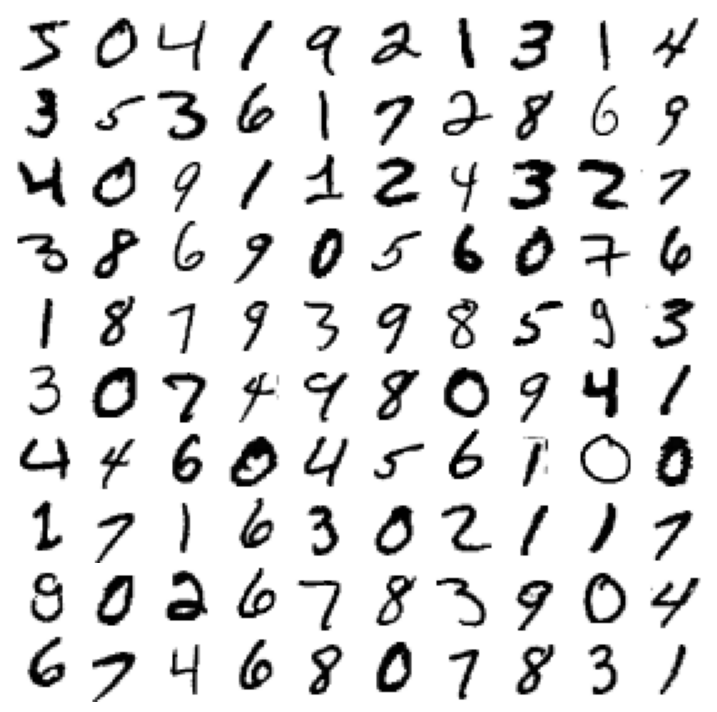

In [28]:
plt.figure(figsize=(9,9))
for idx,image_data in enumerate(X[:100]):
    plt.subplot(10,10, idx+1)
    plot_digit(image_data)

plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

figsize=(width, height) is in inches. So this is a 9×9-inch square.

X[:100] → first 100 digits
    enumerate gives:
    idx → 0 to 99
    image_data → flattened digit (784 values)
    
plt.subplot(rows, columns, position)
    10 rows
    10 columns
    Place the plot at position idx+1

plot_digit(image_data). This calls my earlier function
    wspace → horizontal space between plots
    hspace → vertical space between plots
    Setting them to 0:
    No gaps between digits
    Tight grid
    Looks like a digit mosaic

TRAIN TEST SPLIT:

In [30]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

SHUFFLING THE TRAINING DATA:

In [41]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index],  y_train[shuffle_index]

MNIST has 70,000 samples

Conventionally:

    First 60,000 → training set
    
    Last 10,000 → test set

np.random.permutation(60000)- A random permutation of numbers from 0 to 59999.


Why MNIST must be shuffled ?

    In the raw MNIST dataset:
    
        Digits are grouped by class
        
        Many 0s, then many 1s, then 2s, etc.
        
        If you train without shuffling:
        
        Model sees long runs of the same digit
        
        Learning becomes biased or unstable
        
        Especially bad for SGD-based models
    
    Shuffling ensures:
    
        Each batch has mixed digits
        
        Better convergence
        
        More realistic training

Why NOT shuffle the test set?
    That’s good because:
    
    Test set is for evaluation only
    
    Order does not matter
    
    Shuffling test set is unnecessary

TRAINING A BINARY CLASSIFIER

In [75]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

y_train contains digits: '0' to '9' (strings)

(y_train == '5') performs an element-wise comparison.

Result:y_train_5 → array([False, False, True, False, ...])

So now:

    True → image is a 5
    
    False → image is not a 5

This converts a 10-class problem into a binary classification problem.

Before jumping to 10 classes:

    Binary problems are simpler
    
    Easier to understand:
    
        decision boundary
        
        errors
        
        evaluation metrics
        
    Great for learning how classifiers behave
    
    This specific task:
    
        “Is this digit a 5 or not?”

In [79]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


SGD = Stochastic Gradient Descent.It’s a linear classifier. Trains by updating weights one sample at a time.

Works well for:

    Large datasets
    
    High-dimensional data (like 784 pixels)


X = ['a','b','c','d']

A shuffle might produce: ['c','a','d','b'] 

With random_state = 42 . Every time you run the code, you’ll get:['c','a','d','b'] 

Without random_state . You might get:['b','d','a','c']

In [82]:
sgd_clf.predict([some_digit])

array([ True])

the some_digit is a variable we have previously assigned as X[0]. We have know that it is a 5. now we are checking with the SDG. the output is true showing that it is a 5.

PERFORMANCE MEASURES

MEASURING ACCURACY  USING CROSS-VALIDATION

In [86]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9505 , 0.9652 , 0.96545])

Accuracy = Correct Predictions / Total Predictions 

Why is accuracy misleading here 

    Your task:
    
        Detect digit 5
    
    Reality of MNIST:
    
        Only ~10% of digits are 5
        
        ~90% are not 5


1. Training set

    Used in .fit()
    
    Model learns:
    
    weights
    
    decision boundary

2. Validation set (or cross-validation)
   What is validation?
    
        Data not used for training
        
        Used to:
        
        choose hyperparameters
        
        compare models
        
        pick thresholds
        
        detect overfitting

3. Test set

    Used once
    
    Only after:
    
        model selection
        
        hyperparameter tuning
        
        threshold tuning


Why not tune using the test set?

Because you’ll leak information.

If you:

    Try many models
    
    Check test accuracy each time
    
    Pick the best one

Then:

    Your model is indirectly trained on the test set.

Result:

    Over-optimistic performance
    
    Fails in real-world data
    
    This is called test set contamination.

IMPLEMENTING CROSS VALIDATION

In [93]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf =clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

0.9505
0.9652
0.96545


In [102]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


A DummyClassifier is a baseline model.

It doesn’t learn patterns.
It follows a simple rule, like:

    always predict the most frequent class
    
    predict randomly
    
    predict a constant value.

“Always predict the class that appears most often in the training data.”

dummy_clf.fit(X_train, y_train_5)

Looks at y_train_5

Sees that:

    False (not-5) ≫ True (5)

Learns:

    Always predict False


dummy_clf.predict(X_train) → array of predictions

any(...) → checks if at least one True exists

Output:

False

Meaning:

The dummy classifier never predicts “5”. Not even once.

In [140]:

cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

But accuracy is above 90%. 
Because:

    ~90% of digits are not 5
    
    Predicting “not 5” always:
    
    Correct most of the time
    
    Completely useless for finding 5s

This is the accuracy paradox.

CONFUSION MATRIX

In [143]:
from sklearn.model_selection import cross_val_predict

y_train_pred =cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53853,   726],
       [ 1651,  3770]], dtype=int64)

In [136]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

Here we can see that the values of TP and TN increase. this is beacuse we made all false values to 0.

y_train_5 is a boolean array: True for images of digit 5, False otherwise.

You assigned y_train_perfect_predictions = y_train_5. That means your "predictions" are the same as the true labels.

When you call confusion_matrix(y_train_5, y_train_perfect_predictions), you are comparing the true labels with themselves.

Why TP and TN increased:

In a confusion matrix, TP (true positives) counts cases where the model predicted True, and the true label is True.

TN (true negatives) counts cases where the model predicted 'False', and the true label is False.

Since your "predictions" are identical to the true labels, every single label is correctly predicted, so both TP and TN are maximised.

FP (false positives) and FN (false negatives) become 0 because there are no mistakes.

Essentially, this is like saying, “What if my classifier were perfect?” That’s why it’s called y_train_perfect_predictions.


PRECISION AND RECALL

precision = TP / (TP + FP)

In [155]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8385231316725978

MANUAL CALCULATION TO CHECK THE IN-BUILT:

In [158]:
precision = cm[1,1] / (cm[1,1] + cm[0,1])
precision

0.8385231316725978


recall = TP / (TP + FN)

In [166]:
recall_score(y_train_5, y_train_pred)

0.6954436450839329

In [168]:
recall = cm[1,1] / (cm[1,1] + cm[1,0])
recall

0.6954436450839329

F1 = 2 * (precision * recall) / (precision + recall)

It is often convenient to combine precision and recall into a single metric called the F1
score, in particular, if you need a simple way to compare two classifiers. The F1
score is the harmonic mean of precision and recall (Equation 3-3). Whereas the regular mean
treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1 score if both recall and precision are high

In [176]:
f1_score(y_train_5, y_train_pred)

0.7603105777957043

In [202]:
2 * (precision * recall) / (precision + recall)

0.7603105777957044

PRECISION/RECALL TRADE-OFF:

 increasing precision reduces recall, and
vice versa. This is called the precision/recall tradeoff.

In [206]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([4667.24272631])

with decison_function the number X[0] that is some digit is said to be positive number meaning it is true . If the output is negative then it is not 5.

In [208]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [218]:
y_some_digit_pred

array([ True])

We’re manually converting the score into a Boolean prediction.

y_scores > threshold → True if the score is above the threshold, else False.

Since 4667 > 0, it returns True.

So this is just how you can control the threshold to decide what counts as a positive prediction.

In [200]:
y_scores > 0

array([ True])

In [227]:
threshold = 5000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [223]:
y_score = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

Lower threshold → more positives → higher recall, lower precision

Higher threshold → fewer positives → higher precision, lower recall

In [246]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_score)


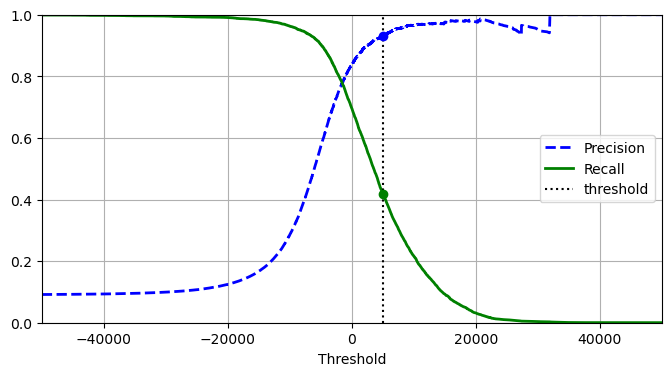

In [244]:

plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

Blue dashed line → Precision vs Threshold

Green solid line → Recall vs Threshold

Vertical line shows your current threshold on the plot.

Left side of plot (low thresholds):

    Almost everything is predicted as 5 → recall is high (you catch almost all 5s)
    
    Precision is low (you also predict many non-5s as 5)

Right side of plot (high thresholds):
    
    Only very confident predictions are labeled 5 → precision is high (few false positives)
    
    Recall is low (you miss some 5s because the threshold is strict)

Intersection region:

    A threshold somewhere in the middle often gives a good balance between precision and recall.

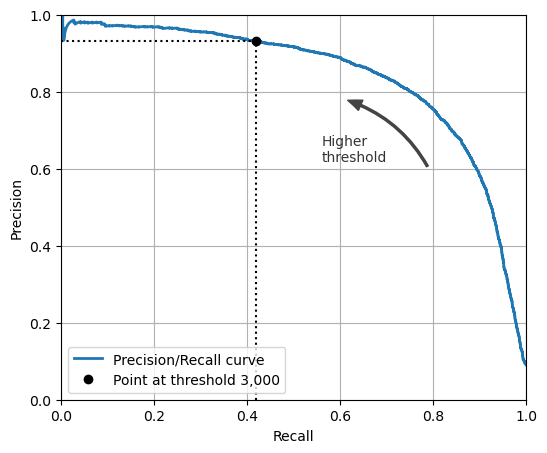

In [252]:
import matplotlib.patches as patches  

plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

X-axis: Recall → how many actual 5s you correctly catch.

Y-axis: Precision → how many predicted 5s are actually correct.

Each point on the curve corresponds to a different threshold.

Curve (blue line) → shows trade-off between precision and recall for all thresholds.

    Top-left → high precision, low recall (strict threshold, few false positives).
    
    Bottom-right → high recall, low precision (lenient threshold, more false positives).

Black dotted lines and black dot → shows your chosen threshold (3000).

    Dot: precision & recall at that threshold.
    
    Dotted lines → project that point onto axes for easy reading.

Arrow labeled “Higher threshold” → shows what happens if you increase the threshold:

    Precision increases (fewer false positives).

    Recall decreases (miss some actual 5s).

In [256]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

2508.7772031840586

precisions >= 0.90 → creates a boolean array: True where precision is ≥ 0.90.

.argmax() → returns the first index where this condition is True.

    This gives you the first threshold that achieves at least 90% precision.

thresholds[idx_for_90_precision] → gives the actual decision score corresponding to that precision.

Result: 2508.78 → this is the threshold you should use to get at least 90% precision.

In [282]:
y_scores_all = sgd_clf.decision_function(X_train)  # all 60,000 samples
y_train_pred_90 = (y_scores_all >= threshold_for_90_precision)

from sklearn.metrics import precision_score
precision_score(y_train_5, y_train_pred_90)


0.8983321909984008

In [284]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.7253274303634016